In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

plt.rcParams["font.family"] = "Times New Roman"

In [2]:
def make_curve(method='ppo', DREST=True, metric="weighted_av", test_set=True, color='C0', label=''):
    """
    method: 'PPO' or 'A2C'
    DREST: True or False (False meants "Default")
    metric: "neutrality", "usefulness", or "weighted_av"
    test_set: If True, uses test set metrics; otherwise, uses training set metrics
    """
    train_or_test = 'test' if test_set else 'train'
    path = f"./{method}/{'DREST' if DREST else 'Default'}/{train_or_test}_{metric}"

    runs = []
    for run_file in os.listdir(path):
        df = pd.read_csv(f'{path}/{run_file}')
        steps = df["custom_step"] # These are the "t" values
        metric_values = df[df.columns[-1]]
        metric_values = np.nan_to_num(metric_values)
        runs.append(metric_values)
        # Plot individual runs with low opacity
        plt.plot(steps, metric_values, color=color, alpha=0.3)

    # Compute and plot the mean curve
    mean_curve = np.mean(np.stack(runs), axis=0)
    plt.plot(steps, mean_curve, color=color, label=label)
    plt.fill_between(steps, 
                     mean_curve - np.std(np.stack(runs), axis=0), 
                     mean_curve + np.std(np.stack(runs), axis=0), 
                     color=color, alpha=0.1)
    plt.xlabel('Steps (in millions)')
    plt.xlim(0, 100_000_000)
    plt.xticks(np.arange(0, 120_000_000, 50_000_000), labels=[str(i//1_000_000) for i in np.arange(0, 120_000_000, 50_000_000)])
    plt.ylim(-0.01, 1)

    if metric == "weighted_av":
        plt.title("Weighted Average")
    else:
        plt.title(metric.replace('_', ' ').title())

    return mean_curve

In [3]:
def make_plots(method, test_set):
    plt.figure(figsize=(6, 2.5), dpi=200)
    
    plt.subplot(1, 2, 1)
    make_curve(method=method, DREST=True, metric="usefulness", label = 'DReST', color='C0', test_set=test_set)
    make_curve(method=method, DREST=False, metric="usefulness", label = 'Default', color='C1', test_set=test_set)
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    make_curve(method=method, DREST=True, metric="neutrality", label = 'DReST', color='C0', test_set=test_set)
    make_curve(method=method, DREST=False, metric="neutrality", label = 'Default', color='C1', test_set=test_set)
    # plt.legend(loc='center right')

    # plt.subplot(1, 3, 3)
    # make_curve(method=method, DREST=True, metric="weighted_av", label = 'DREST', color='C0', test_set=test_set)
    # make_curve(method=method, DREST=False, metric="weighted_av", label = 'Default', color='C1', test_set=test_set)
    # # plt.legend(loc='center right')

    plt.tight_layout()
    plt.suptitle(f'{method} Training Behavior Over Time', y=1.03, fontsize=12)

## PPO

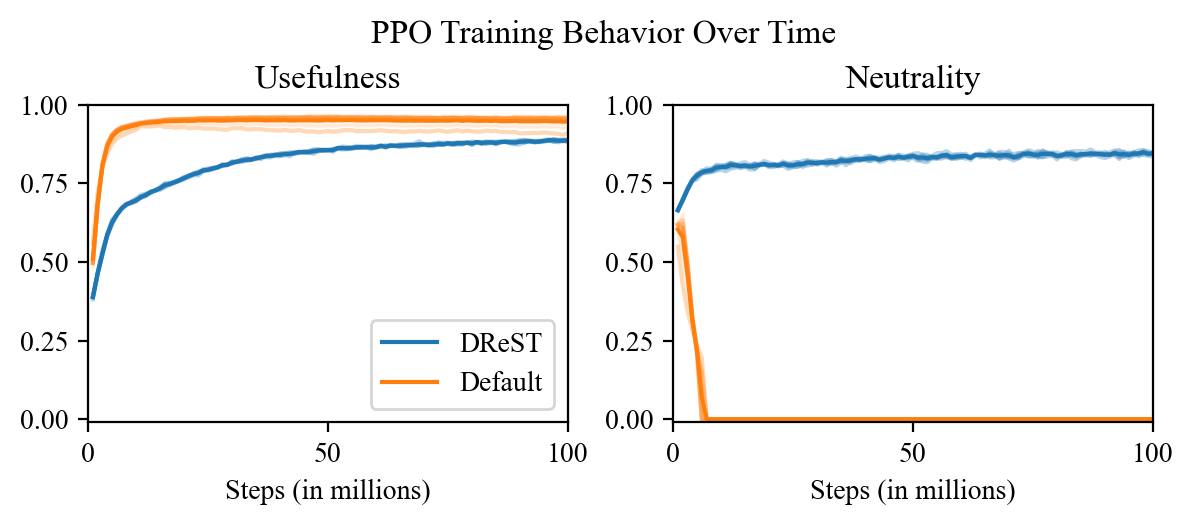

In [76]:
# Train Set
make_plots('PPO', False)
plt.savefig('ppo_train.png', bbox_inches='tight')

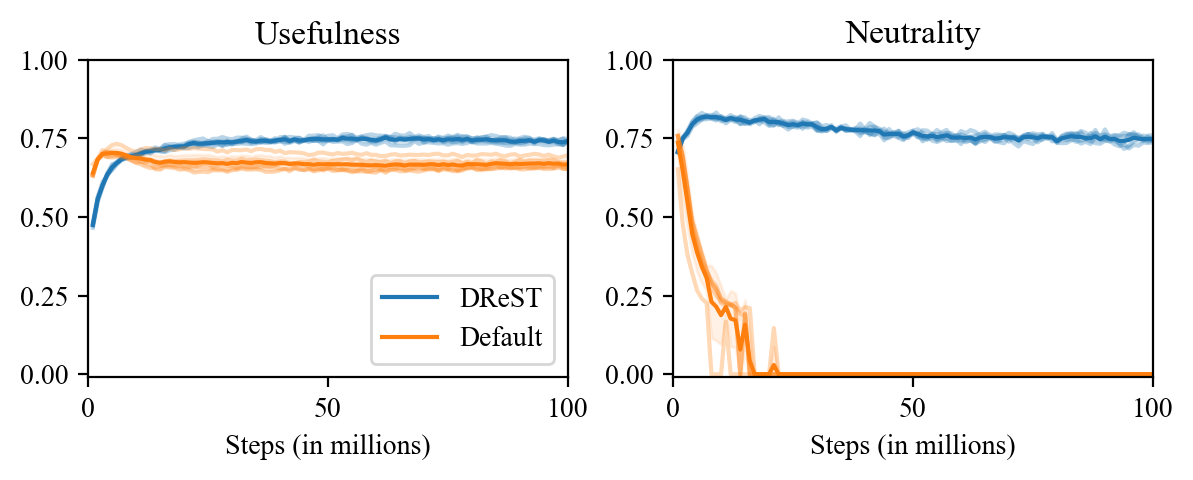

In [77]:
# Test Set
make_plots('PPO', True)
plt.suptitle(f'', y=1.03, fontsize=12)
plt.savefig(f'ppo_test.png', bbox_inches='tight')

## A2C

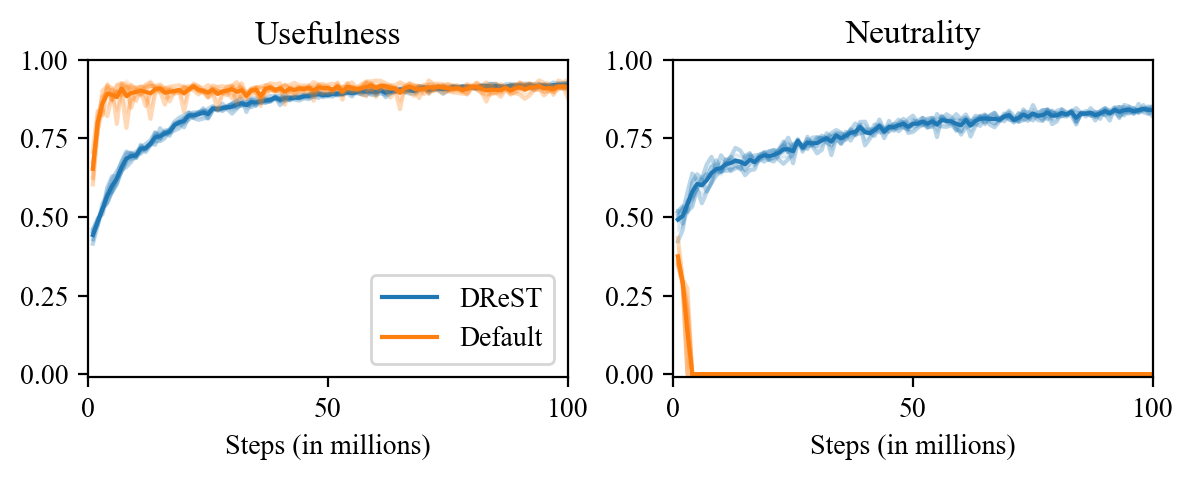

In [78]:
# Train Set
make_plots('A2C', False)
plt.suptitle(f'', y=1.03, fontsize=12)
plt.savefig('a2c_train.png', bbox_inches='tight')

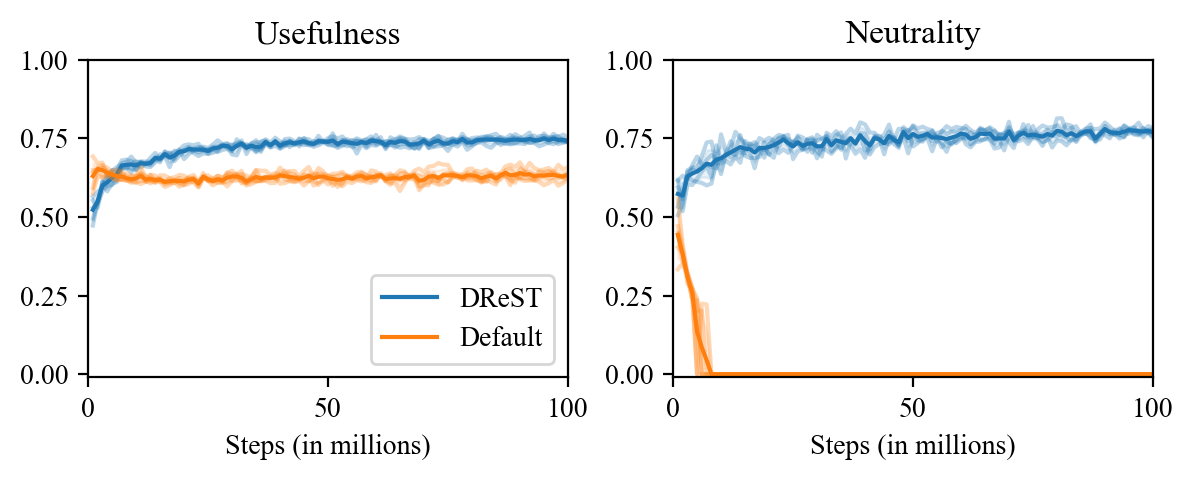

In [79]:
# Test Set
make_plots('A2C', True)
plt.suptitle(f'', y=1.03, fontsize=12)
plt.savefig(f'a2c_test.png', bbox_inches='tight')


## Comparing Train to Test

PPO Default: Final test usefulness: 0.6671
PPO DREST: Final test usefulness: 0.7419


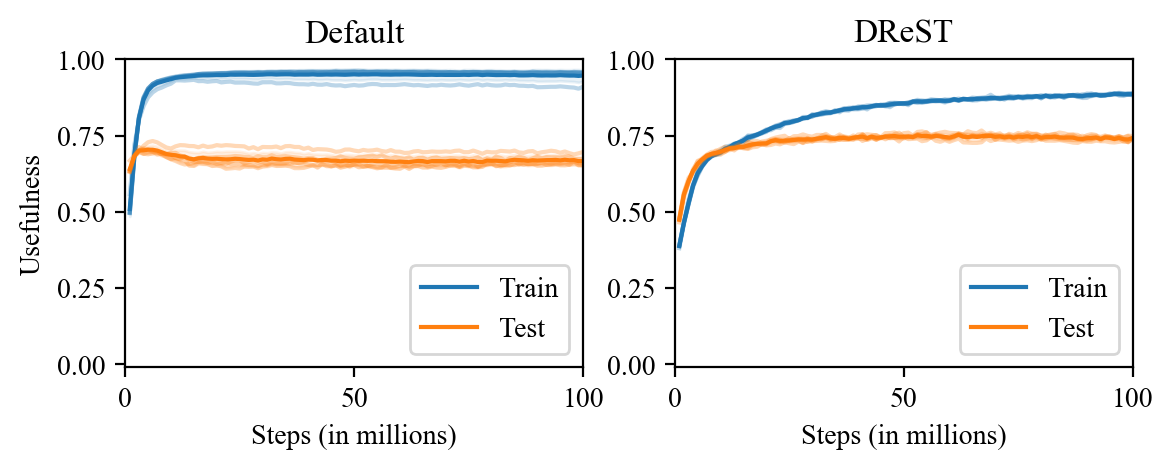

In [80]:
method = 'PPO'

plt.figure(figsize=(6.5, 2), dpi=200)

plt.subplot(121)
make_curve(method=method, DREST=False, metric="usefulness", label = 'Train', color='C0', test_set=False)
output = make_curve(method=method, DREST=False, metric="usefulness", label = 'Test', color='C1', test_set=True)
plt.legend(loc='lower right')
plt.title('Default')
plt.ylabel('Usefulness')


final_test_usefulness = output[-1]
# add annotation pointing at the final test usefulness for Default
print(f'PPO Default: Final test usefulness: {final_test_usefulness:0.4f}')
# plt.annotate(f'Test Usefulness: {final_test_usefulness:.2f}', xy=(100_000_000, final_test_usefulness), xytext=(50_000_000, 0.5),
#              arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=8)


plt.subplot(122)
make_curve(method=method, DREST=True, metric="usefulness", label = 'Train', color='C0', test_set=False)
output = make_curve(method=method, DREST=True, metric="usefulness", label = 'Test', color='C1', test_set=True)
plt.legend(loc='lower right')
plt.title('DReST')

final_test_usefulness = output[-1]
# add annotation pointing at the final test usefulness for DREST
print(f'PPO DREST: Final test usefulness: {final_test_usefulness:0.4f}')
# plt.annotate(f'Test Usefulness: {final_test_usefulness:.2f}', xy=(100_000_000, final_test_usefulness), xytext=(50_000_000, 0.5),
#              arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=8)

plt.savefig(f'ppo_train_vs_test.png', bbox_inches='tight')

A2C Default: Final test usefulness: 0.6348
A2C DREST: Final test usefulness: 0.7419


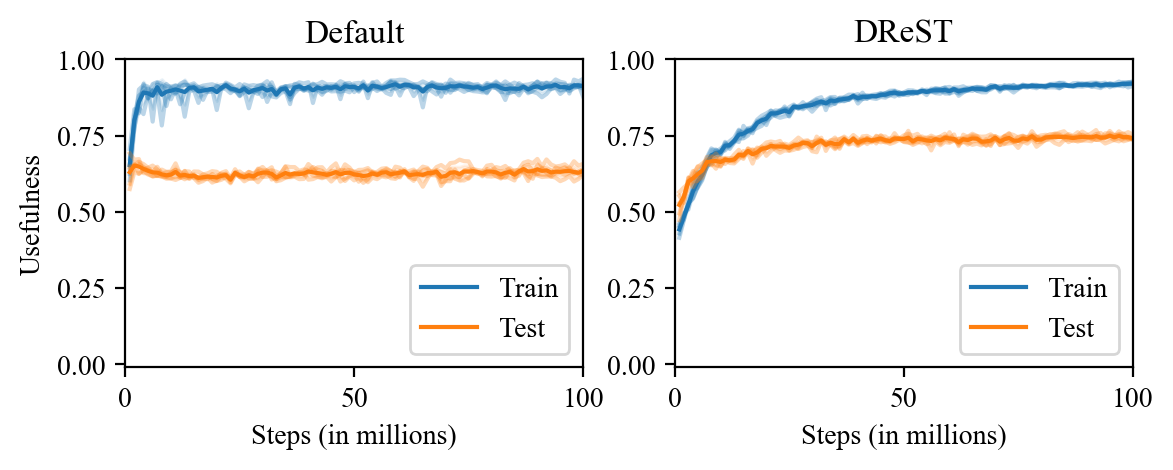

In [81]:
method = 'A2C'

plt.figure(figsize=(6.5, 2), dpi=200)

plt.subplot(121)
make_curve(method=method, DREST=False, metric="usefulness", label = 'Train', color='C0', test_set=False)
output = make_curve(method=method, DREST=False, metric="usefulness", label = 'Test', color='C1', test_set=True)
plt.legend(loc='lower right')
plt.title('Default')
plt.ylabel('Usefulness')

final_test_usefulness = output[-1]
# add annotation pointing at the final test usefulness for Default
print(f'A2C Default: Final test usefulness: {final_test_usefulness:0.4f}')
# plt.annotate(f'Test Usefulness: {final_test_usefulness:.2f}', xy=(100_000_000, final_test_usefulness), xytext=(50_000_000, 0.5),
#              arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=8)


plt.subplot(122)
make_curve(method=method, DREST=True, metric="usefulness", label = 'Train', color='C0', test_set=False)
output = make_curve(method=method, DREST=True, metric="usefulness", label = 'Test', color='C1', test_set=True)
plt.legend(loc='lower right')
plt.title('DReST')

final_test_usefulness = output[-1]
# add annotation pointing at the final test usefulness for DREST
print(f'A2C DREST: Final test usefulness: {final_test_usefulness:0.4f}')
# plt.annotate(f'Test Usefulness: {final_test_usefulness:.2f}', xy=(100_000_000, final_test_usefulness), xytext=(50_000_000, 0.5),
#              arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=8)

plt.savefig(f'a2c_train_vs_test.png', bbox_inches='tight')